In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter 
import numpy as np
from scipy.stats import special_ortho_group
import numpy.linalg as LA

In [11]:
def random_so_char_poly(nn, cutoff, sample=100):
    ret = []
    ct = 0
    while ct <  sample:
        m = special_ortho_group.rvs(dim=nn)
        ss = abs(sum(np.poly(m)))
        if ss > cutoff:
            ee = np.angle(LA.eigvals(m))
            ret.append( min([i for i in ee if i > 0]))
            ct = ct + 1
    return ret
            

            

In [12]:
# generates list of eigenvalues above some cutoff.  Used for baseline, with cutoff = 0
def random_so_evals(nn,cutoff,sample=10000, seed=42):
    ret = []
    for _ in range(sample):
        m = special_ortho_group.rvs(dim=nn)
        ee = np.angle(LA.eigvals(m))-cutoff  # looking for the smallest angle above the cutoff
        ret.append(min([i for i in ee if i > 0]))
    return ret
    
    

In [13]:
ss = random_so_evals(24, 0, sample=10000)
df_angles_no_cutoff = pd.DataFrame(ss, columns=['angles'])
df_angles_no_cutoff["Normalized lowest eigenvalue"] = df_angles_no_cutoff["angles"]/np.mean(df_angles_no_cutoff["angles"])

## 11.2

In [14]:
c_std = 1.6
N_std = 12
k = 2
cutoff = c_std*np.exp((1-k)*N_std/2)

In [15]:
ss = random_so_char_poly(24,cutoff, sample=10000 )
df_angles = pd.DataFrame(ss, columns=['angles'])
df_angles["Normalized lowest eigenvalue"] = df_angles["angles"]/np.mean(df_angles["angles"])

In [16]:
df_zeros = pd.read_csv("../data/experiment_11.2.out", names=['disc','zero_1','zero_2'], index_col=False)
df_zeros = df_zeros.loc[df_zeros["zero_1"] > 0 ]
df_zeros["Normalized lowest first zero"] = df_zeros["zero_1"]/np.mean(df_zeros["zero_1"])

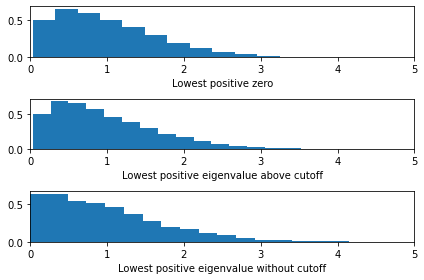

In [17]:
fig, axs = plt.subplots(3, 1, tight_layout=True)

n_bins=20

dist1 = df_zeros["Normalized lowest first zero"]
dist2 = df_angles["Normalized lowest eigenvalue"]
dist3 = df_angles_no_cutoff["Normalized lowest eigenvalue"]

axs[0].hist(dist1, bins=n_bins*4, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)
axs[2].hist(dist3, bins=n_bins, density=True)


axs[0].set_xlabel('Lowest positive zero')
axs[1].set_xlabel('Lowest positive eigenvalue above cutoff')
axs[2].set_xlabel('Lowest positive eigenvalue without cutoff')


axs[0].set_xlim(0,5)
axs[1].set_xlim(0,5)
axs[2].set_xlim(0,5)


plt.savefig("/home/ncr006/research/rmt-families/paper/images/cutoff_11_2.png")

# 7.4

In [77]:
c_std = 26000
N_std = 12
k = 4
cutoff = c_std*np.exp((1-k)*N_std/2)

In [78]:
ss = random_so_char_poly(24,cutoff, sample=10000 )
df_angles = pd.DataFrame(ss, columns=['angles'])
df_angles["Normalized lowest eigenvalue"] = df_angles["angles"]/np.mean(df_angles["angles"])

In [79]:
df_zeros = pd.read_csv("../data/experiment_7.4.out", names=['disc','zero_1','zero_2'], index_col=False)

def format_to_float(xx):
    xx = xx.replace(" ","")
    return float(xx)

df_zeros["zero_1"] = df_zeros["zero_1"].apply(format_to_float)

df_zeros = df_zeros.loc[df_zeros["zero_1"] > 0 ]
df_zeros["Normalized lowest first zero"] = df_zeros["zero_1"]/np.mean(df_zeros["zero_1"])

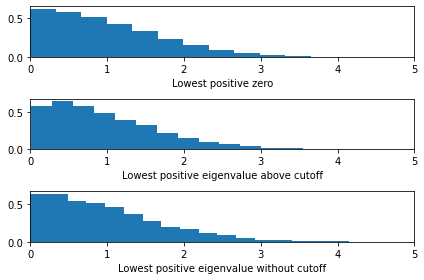

In [80]:
fig, axs = plt.subplots(3, 1, tight_layout=True)

n_bins=20

dist1 = df_zeros["Normalized lowest first zero"]
dist2 = df_angles["Normalized lowest eigenvalue"]
dist3 = df_angles_no_cutoff["Normalized lowest eigenvalue"]

axs[0].hist(dist1, bins=n_bins*10, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)
axs[2].hist(dist3, bins=n_bins, density=True)


axs[0].set_xlabel('Lowest positive zero')
axs[1].set_xlabel('Lowest positive eigenvalue above cutoff')
axs[2].set_xlabel('Lowest positive eigenvalue without cutoff')


axs[0].set_xlim(0,5)
axs[1].set_xlim(0,5)
axs[2].set_xlim(0,5)


plt.savefig("/home/ncr006/research/rmt-families/paper/images/cutoff_7_4.png")

## 6.3


In [81]:
c_std = 2.97e+5
N_std = 12
k = 6
cutoff = c_std*np.exp((1-k)*N_std/2)

In [82]:
ss = random_so_char_poly(24,cutoff, sample=10000 )
df_angles = pd.DataFrame(ss, columns=['angles'])
df_angles["Normalized lowest eigenvalue"] = df_angles["angles"]/np.mean(df_angles["angles"])

In [83]:
df_zeros = pd.read_csv("../data/experiment_3.6.out", names=['disc','zero_1','zero_2'], index_col=False)

def format_to_float(xx):
    xx = xx.replace(" ","")
    return float(xx)

df_zeros["zero_1"] = df_zeros["zero_1"].apply(format_to_float)

df_zeros = df_zeros.loc[df_zeros["zero_1"] > 0 ]
df_zeros["Normalized lowest first zero"] = df_zeros["zero_1"]/np.mean(df_zeros["zero_1"])

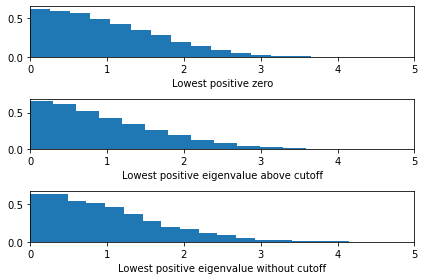

In [86]:
fig, axs = plt.subplots(3, 1, tight_layout=True)

n_bins=20

dist1 = df_zeros["Normalized lowest first zero"]
dist2 = df_angles["Normalized lowest eigenvalue"]
dist3 = df_angles_no_cutoff["Normalized lowest eigenvalue"]

axs[0].hist(dist1, bins=n_bins*2, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)
axs[2].hist(dist3, bins=n_bins, density=True)


axs[0].set_xlabel('Lowest positive zero')
axs[1].set_xlabel('Lowest positive eigenvalue above cutoff')
axs[2].set_xlabel('Lowest positive eigenvalue without cutoff')


axs[0].set_xlim(0,5)
axs[1].set_xlim(0,5)
axs[2].set_xlim(0,5)


plt.savefig("/home/ncr006/research/rmt-families/paper/images/cutoff_3_6.png")

## 8.3

In [87]:
c_std = 7.08e+14
N_std = 12
k = 8
cutoff = c_std*np.exp((1-k)*N_std/2)

In [88]:
ss = random_so_char_poly(24,cutoff, sample=10000 )
df_angles = pd.DataFrame(ss, columns=['angles'])
df_angles["Normalized lowest eigenvalue"] = df_angles["angles"]/np.mean(df_angles["angles"])

In [94]:
df_zeros = pd.read_csv("../data/experiment_3.8.out", names=['disc','zero_1','zero_2'], index_col=False)

def format_to_float(xx):
    xx = xx.replace(" ","")
    return float(xx)

df_zeros["zero_1"] = df_zeros["zero_1"].apply(format_to_float)

df_zeros = df_zeros.loc[df_zeros["zero_1"] > 0 ]
df_zeros["Normalized lowest first zero"] = df_zeros["zero_1"]/np.mean(df_zeros["zero_1"])

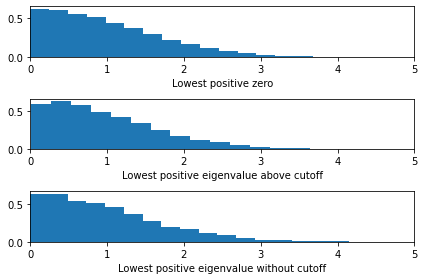

In [95]:
fig, axs = plt.subplots(3, 1, tight_layout=True)

n_bins=20

dist1 = df_zeros["Normalized lowest first zero"]
dist2 = df_angles["Normalized lowest eigenvalue"]
dist3 = df_angles_no_cutoff["Normalized lowest eigenvalue"]

axs[0].hist(dist1, bins=n_bins+10, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)
axs[2].hist(dist3, bins=n_bins, density=True)


axs[0].set_xlabel('Lowest positive zero')
axs[1].set_xlabel('Lowest positive eigenvalue above cutoff')
axs[2].set_xlabel('Lowest positive eigenvalue without cutoff')


axs[0].set_xlim(0,5)
axs[1].set_xlim(0,5)
axs[2].set_xlim(0,5)


plt.savefig("/home/ncr006/research/rmt-families/paper/images/cutoff_3_8.png")